# Visualizing Data

## Introduction to Python

Data Sciences Institute, University of Toronto

Instructor: A Mahfouz | TA: Kaylie Lau  
July 2022

### Jupyter Notebook as a Slideshow

To see this notebook as a live slideshow, we need to install RISE (Reveal.js - Jupyter/IPython Slideshow Extension):

1. Insert a cell and execute the following code: `conda install -c conda-forge rise`
2. Restart the Jupyter Notebook.
3. On the top of your notebook you have a new icon that looks like a bar chart; hover over the icon to see 'Enter/Exit RISE Slideshow'.
4. Click on the RISE icon and enjoy the slideshow.
5. You can edit the notebook in a slideshow mode by double clicking the line.
*This is done only once. Now all your notebooks will have the RISE extension (unless you re-install the Jupyter Notebook).*

# Contents:

1. Setup
2. `matplotlib`
3. `seaborn`

# Setup

## Anaconda

Install `seaborn` and `plotly` if you haven't already. If you're not sure, go through the steps below.

1. Open Anaconda Prompt. You may have to do this in admin mode.
2. Type `conda install seaborn` and press enter to run. Do the same for `plotly`.
3. Press `enter` to answer Y to any prompts.

## Google Colab

If you're using Colab, you're all set! `seaborn` and `plotly` are already installed.

## Supporting packages and data

Let's import `numpy` and `pandas` and load up some data to work with.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load data
thefts_joined = pd.read_csv('../data/bike_thefts_joined.csv',
                           dtype={'n_id': str})
neighbourhoods = pd.read_csv('../data/neighbourhoods.csv',
                            dtype={'n_id': str})

# fix dates
thefts_joined['occurrence_date'] = pd.to_datetime(thefts_joined['occurrence_date'])
thefts_joined['report_date'] = pd.to_datetime(thefts_joined['report_date'])

In [3]:
thefts_joined.head()

,_id,objectid,event_unique_id,primary_offence,occurrence_date,occurrence_year,occurrence_month,occurrence_dayofweek,occurrence_dayofmonth,occurrence_dayofyear,...,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike
0,1,17744,GO-20179016397,THEFT UNDER,2017-10-03,2017,October,Tuesday,3,276,...,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008
1,2,17759,GO-20172033056,THEFT UNDER - BICYCLE,2017-11-08,2017,November,Wednesday,8,312,...,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008
2,3,17906,GO-20189030822,THEFT UNDER - BICYCLE,2018-09-14,2018,September,Friday,14,257,...,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008
3,4,17962,GO-2015804467,THEFT UNDER,2015-05-07,2015,May,Thursday,7,127,...,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008
4,5,17963,GO-20159002781,THEFT UNDER,2015-05-16,2015,May,Saturday,16,136,...,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008


In [4]:
# exclude the City of Toronto
neighbourhoods = neighbourhoods.loc[neighbourhoods['neighbourhood'] != 'City of Toronto']
neighbourhoods.head()

,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike
0,Agincourt North,129,No Designation,29113,30279,-0.039,9371,9120,3929,7.41,11820,7155,930,3350,265,70,45,0.006
1,Agincourt South-Malvern West,128,No Designation,23757,21988,0.080,8535,8136,3034,7.83,10160,6135,665,2985,280,35,65,0.003
2,Alderwood,20,No Designation,12054,11904,0.013,4732,4616,2435,4.95,6045,4090,355,1285,195,65,65,0.011
3,Annex,95,No Designation,30526,29177,0.046,18109,15934,10863,2.81,14910,3290,290,6200,3200,1675,225,0.112
4,Banbury-Don Mills,42,No Designation,27695,26918,0.029,12473,12124,2775,9.98,11395,7150,500,2945,615,65,140,0.006


In [5]:
# add new columns showing % of commuters for each mode
def calc_pct(mode):
    return round(mode/neighbourhoods['total_commuters'], 3)

neighbourhoods[['pct_drive', 'pct_cp', 'pct_transit', 'pct_walk']] = neighbourhoods.loc[:, 'drive':'walk'].apply(calc_pct)

# Overview

## Data visualization in Python

So far, we have gotten data, wrangled it, and scratched the surface of exploratory analyses. As part of that exploration, we created charts with `pandas`. However, there are dedicated visualization libraries let us customize our charts further.

# `matplotlib`

## `matplotlib`

`matplotlib` is _the_ foundational data visualization library in Python. `pandas`'s visualization functions are, at their core,  `matplotlib` functions. Other popular libraries like `seaborn` and similarly build on `matplotlib`.

For historical reasons, when we import `matplotlib`, we really import `matplotlib.pyplot`. The conventional alias is `plt`.

In [6]:
# jupyter-specific "magic" command to render plots in-line
%matplotlib inline

import matplotlib.pyplot as plt

## Anatomy of a plot

`matplotlib` visuals consist of one or more Axes in a Figure. An _Axes_, confusingly, is what we would consider a graph, while the _Figure_ is a container for those graphs. An Axes has an x-_Axis_ and a y-_Axis_.

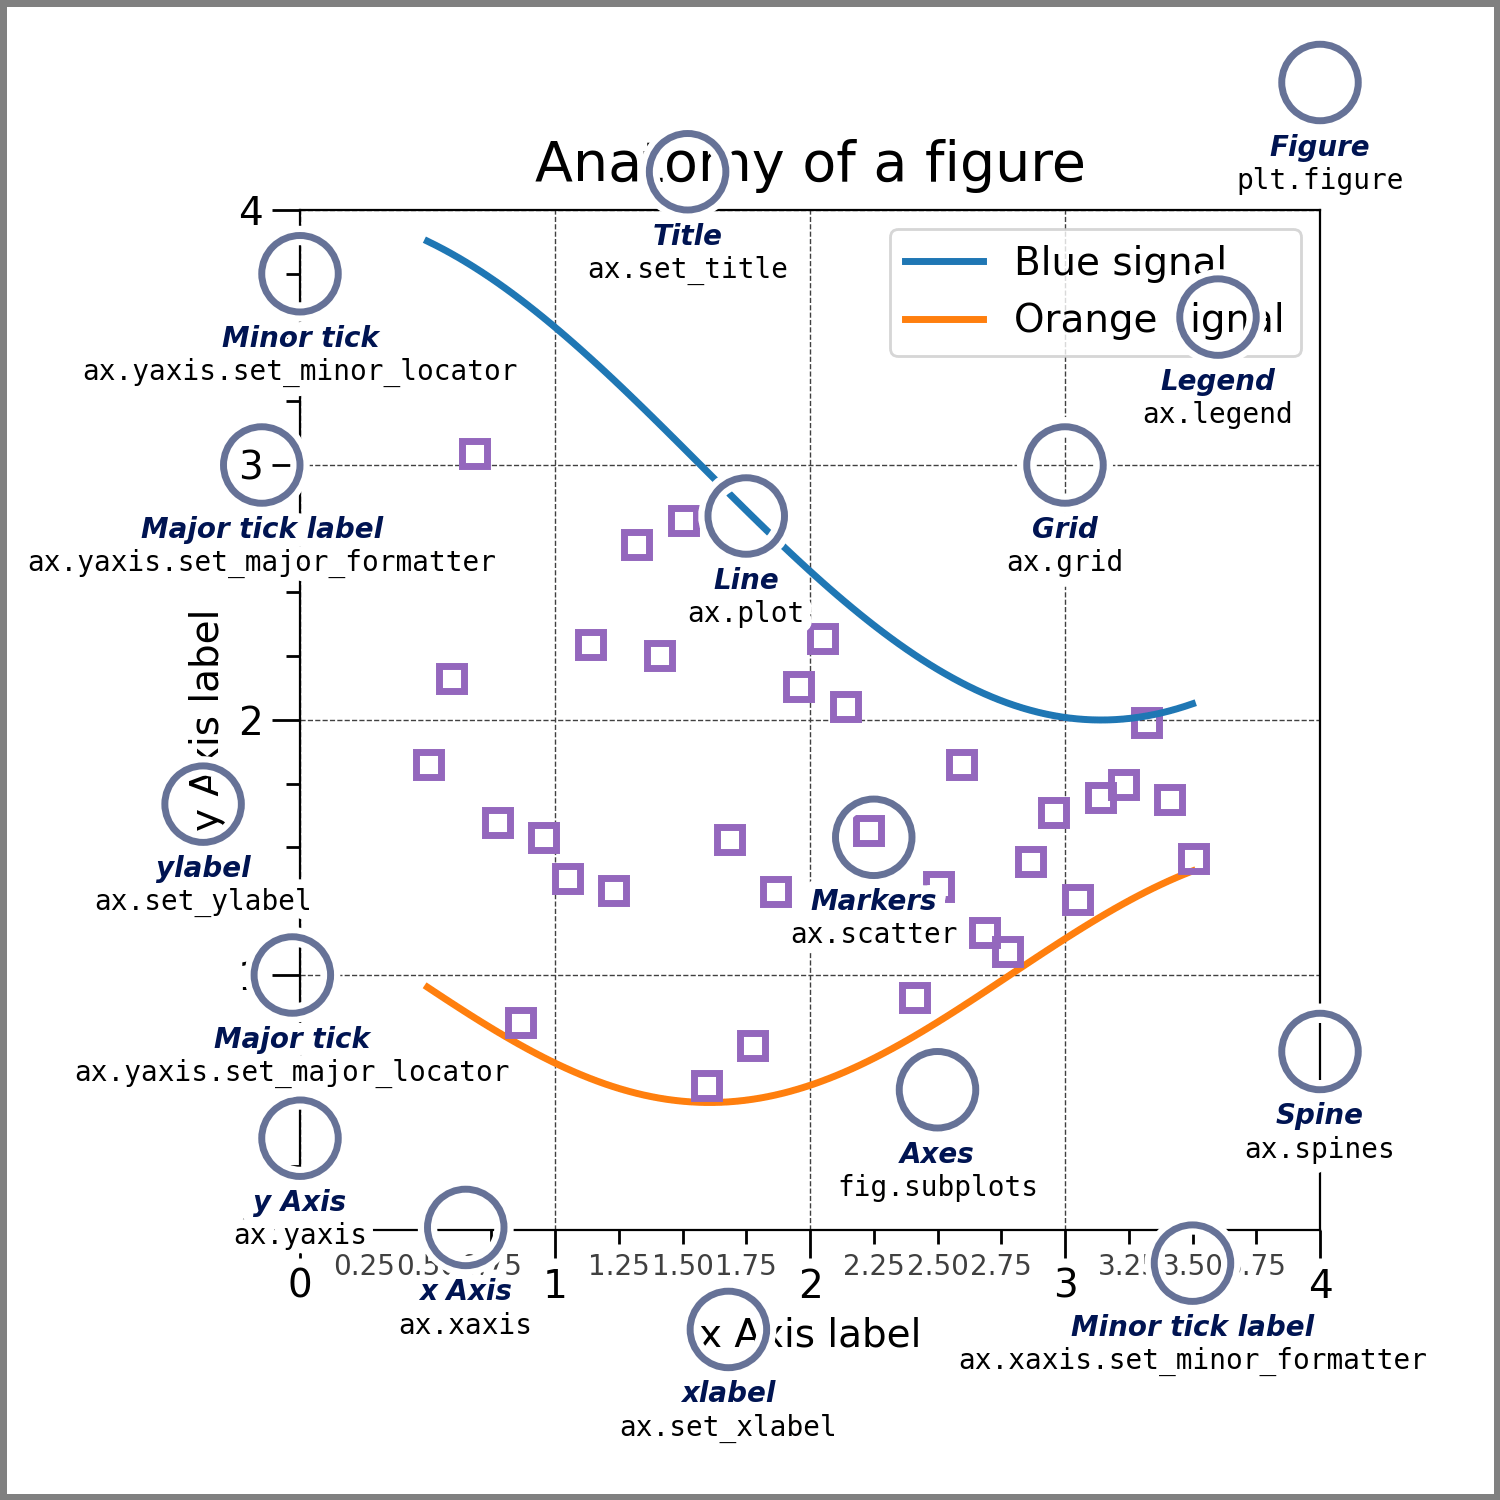

## Plotting with `matplotlib`

`matplotlib` provides two ways to create visualizations:
* by having **`pyplot`** automatically create and manage Figures and Axes, keeping track of which Figure and Axes we are currently working on
* by taking an **object-oriented approach**, where we explicitly create Figures and Axes and modify them

The object-oriented approach is recommended, but the `pyplot` approach is convenient for quick plots.

## `pyplot`-style plotting

`pyplot`-style plotting is convenient for quick, exploratory plots, where we don't plan on doing a lot of customization. When we plotted data in `pandas`, `pandas` took this approach. Let's plot the neighbourhood data with the `pyplot` approach. `plot()` produces a line plot by default.

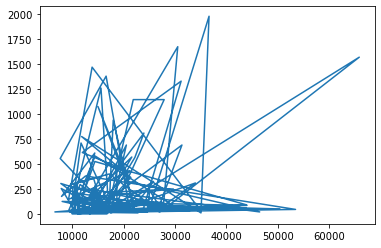

In [7]:
plt.plot(neighbourhoods['pop_2016'], 
         neighbourhoods['bike'])

Let's make it a scatterplot instead with the `scatter()` function.
We can use keyword arguments like `facecolor` and `edgecolor` to change the styling. `matplotlib` lets us specify colour with RGB(A) tuples, hexadecimal strings, single-character shortcodes, and [even xkcd colours](https://matplotlib.org/stable/tutorials/colors/colors.html).

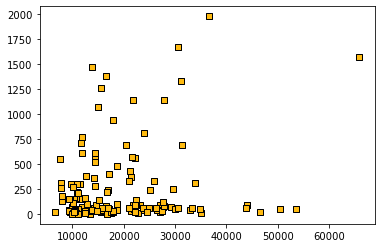

In [8]:
plt.scatter(neighbourhoods['pop_2016'], 
            neighbourhoods['bike'],
            marker='s',  # square marker
            facecolor='#fb1',
            edgecolor='k') # black

Using the `pyplot` approach, the outputs of successive function calls in the same cell context are layered on. Let's layer driving and biking commuter counts and add a legend.

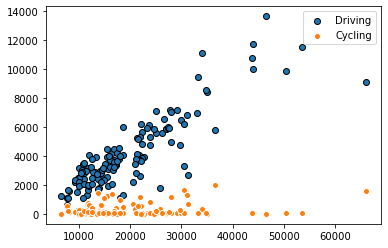

In [9]:
plt.scatter(neighbourhoods['pop_2016'], 
            neighbourhoods['drive'],
            edgecolor='k',
            label='Driving')
plt.scatter(neighbourhoods['pop_2016'], 
            neighbourhoods['bike'],
            edgecolor='w',
            label='Cycling')
plt.legend()

Calls in a different cell are treated as a new Axes.

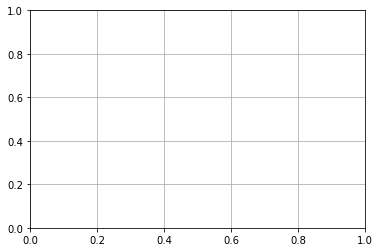

In [10]:
plt.grid()

## Object-oriented approach to plotting

The object-oriented approach is the preferred method of plotting with `matplotlib`. In this approach, we use the `subplots()` function to create plot objects, then call methods to modify them.

By default, `subplots()` returns one Figure and one Axes. We can use Python's unpacking syntax to assign the Figure and Axes to their own variables in one line.

<class 'matplotlib.figure.Figure'>, <class 'matplotlib.axes._subplots.AxesSubplot'>


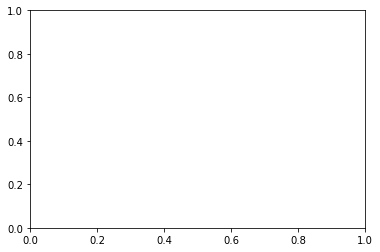

In [11]:
fig, ax = plt.subplots()
print(f'{type(fig)}, {type(ax)}')

The Axes is empty. Let's plot data on it with the Axes `scatter()` method. This method updates `ax` with a scatterplot. To make it easier to refer to each scatterplot later, we assign the outputs to their own variables, `drivers` and `cyclists`.

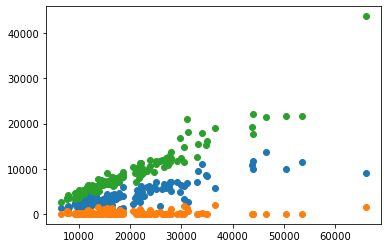

In [12]:
drivers = ax.scatter(neighbourhoods['pop_2016'],
           neighbourhoods['drive'])
cyclists = ax.scatter(neighbourhoods['pop_2016'],
           neighbourhoods['bike'])
total = ax.scatter(neighbourhoods['pop_2016'],
                  neighbourhoods['total_commuters'])
fig

## Adding labels, a title, and grid

This graph doesn't give much context. To add a title, we can use the Axes `set_title()` method, which takes the title as a string, plus optional arguments like `fontsize`. Similarly, we can set x and y labels with the `set_xlabel()` and `set_ylabel()` methods. Finally, let's add a grid with the Axes `grid()` method, and use the `alpha` parameter to make it translucent. We'll also use the `set_axisbelow()` method to make sure markers draw over the grid.

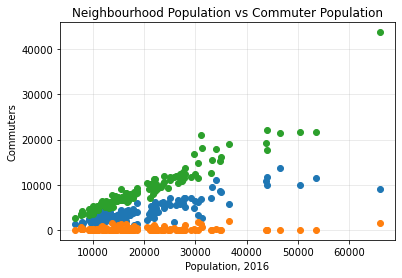

In [13]:
ax.set_title('Neighbourhood Population vs Commuter Population')
ax.set_xlabel('Population, 2016')
ax.set_ylabel('Commuters')
ax.set_axisbelow(True)
ax.grid(alpha=0.3)
fig

## Adding a legend

This graph could use a legend. To add one, we call the Axes `legend()` method. If we passed a `label` argument in the `scatter()` calls, `legend()` would use those labels. However, because we did not, we pass a list of the geometries to use in the legend, plus a list of labels to show.

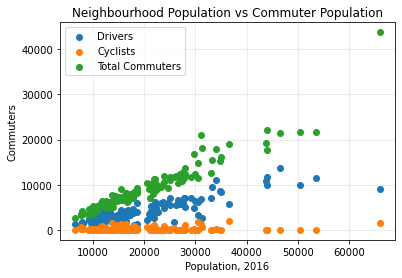

In [14]:
ax.legend([drivers, cyclists, total], 
          ['Drivers', 'Cyclists', 'Total Commuters'])
fig

To place the legend outside the Axes, we can pass a tuple with the `bbox_to_anchor` argument. The legend's `loc` corner will be placed at the coordinates in the `bbox_to_anchor` tuple.

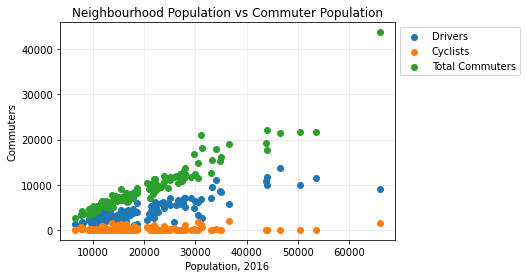

In [15]:
ax.legend([drivers, cyclists, total], 
          ['Drivers', 'Cyclists', 'Total Commuters'],
          bbox_to_anchor=(1, 1),
          loc='upper left')
fig

## Modifying axis ticks

We can change how the x-axis and y-axis are formatted by accessing an Axes `xaxis` and `yaxis` attributes and calling methods like `set_ticks()` or `set_major_formatter()`.

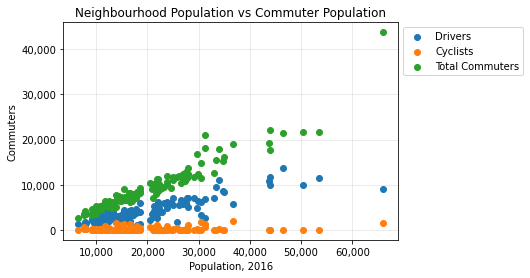

In [16]:
# label with a thousands place comma and zero decimal places
ax.xaxis.set_major_formatter('{x:,.0f}')
ax.yaxis.set_major_formatter('{x:,.0f}')
fig

We can also change axis limits.

In [17]:
#ax.xaxis.set_ticks(np.arange(0, max(neighbourhoods['pop_2016']+10), 10000))

In [18]:
ax.axis()

(3610.2, 68879.8, -2189.25, 45974.25)

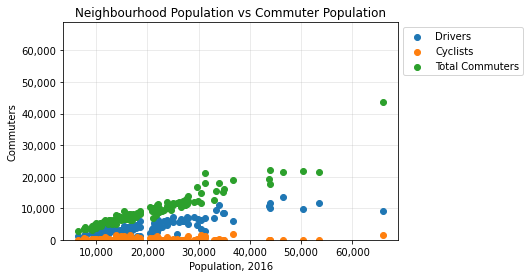

In [19]:
ax.set(ylim=(0, ax.axis()[1])) # make the y-axis match the x-axis
fig

## Changing styles

`matplotlib` comes with a bunch of predefined styles. We can view the available ones with `plt.style.available`. Passing one of the options to `style.use()` makes it the aesthetic style for all new plots. **Already created Figures and Axes are not affected.**

In [20]:
plt.style.available[5:10]  # print a subset

['classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot']

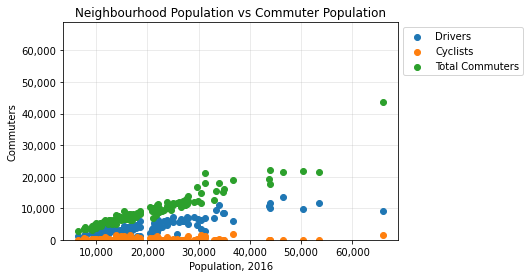

In [21]:
# set style for new plots
plt.style.use('fivethirtyeight')

# notice that the style of fig did not change
fig

## Other plot types

Of course, `matplotlib` offers more than just line plots and scatterplots. Among the many kinds of plots we can make are bar plots, histograms, and boxplots. To create each the object-oriented way, we call the appropriate Axes method, like `Axes.boxplot()` or `Axes.barh()`, for a horizontal bar plot.

In [22]:
# review the neighbourhoods data
neighbourhoods.head()

,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,...,car_passenger,transit,walk,bike,other,pct_bike,pct_drive,pct_cp,pct_transit,pct_walk
0,Agincourt North,129,No Designation,29113,30279,-0.039,9371,9120,3929,7.41,...,930,3350,265,70,45,0.006,0.605,0.079,0.283,0.022
1,Agincourt South-Malvern West,128,No Designation,23757,21988,0.080,8535,8136,3034,7.83,...,665,2985,280,35,65,0.003,0.604,0.065,0.294,0.028
2,Alderwood,20,No Designation,12054,11904,0.013,4732,4616,2435,4.95,...,355,1285,195,65,65,0.011,0.677,0.059,0.213,0.032
3,Annex,95,No Designation,30526,29177,0.046,18109,15934,10863,2.81,...,290,6200,3200,1675,225,0.112,0.221,0.019,0.416,0.215
4,Banbury-Don Mills,42,No Designation,27695,26918,0.029,12473,12124,2775,9.98,...,500,2945,615,65,140,0.006,0.627,0.044,0.258,0.054


In [23]:
# get just the 10 biggest neighbourhoods to plot
top10_pop = neighbourhoods.sort_values('pop_2016', ascending=False).head(10)
top10_pop

,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,...,car_passenger,transit,walk,bike,other,pct_bike,pct_drive,pct_cp,pct_transit,pct_walk
123,Waterfront Communities-The Island,77,No Designation,65913,43361,0.520,47209,40756,8943,7.37,...,760,10915,20855,1570,610,0.036,0.208,0.017,0.249,0.476
133,Woburn,137,NIA,53485,53350,0.003,19098,18436,4345,12.31,...,1405,7635,780,45,210,0.002,0.533,0.065,0.354,0.036
130,Willowdale East,51,No Designation,50434,45041,0.120,23901,22304,10087,5.00,...,695,9390,1550,50,215,0.002,0.454,0.032,0.431,0.071
106,Rouge,131,No Designation,46496,45912,0.013,13730,13389,1260,36.89,...,1510,5935,220,20,160,0.001,0.636,0.070,0.276,0.010
66,L'Amoreaux,117,Emerging Neighbourhood,43993,44919,-0.021,15486,15037,6144,7.16,...,1220,5895,370,85,120,0.005,0.565,0.069,0.333,0.021
59,Islington-City Centre West,14,No Designation,43965,38084,0.154,19911,19328,2712,16.21,...,975,8205,795,90,195,0.004,0.534,0.044,0.372,0.036
74,Malvern,132,Emerging Neighbourhood,43794,45086,-0.029,13936,13426,4948,8.85,...,1400,6425,425,60,115,0.003,0.561,0.073,0.334,0.022
33,Dovercourt-Wallace Emerson-Junction,93,No Designation,36625,34631,0.058,16248,15320,9819,3.73,...,820,8950,1215,1980,310,0.104,0.305,0.043,0.469,0.064
34,Downsview-Roding-CFB,26,NIA,35052,34659,0.011,14244,13121,2337,15.00,...,1060,6085,460,10,145,0.001,0.520,0.066,0.376,0.028
96,Parkwoods-Donalda,45,No Designation,34805,34617,0.005,13921,13315,4691,7.42,...,820,5275,420,45,115,0.003,0.562,0.054,0.345,0.028


Text(0.5, 0, 'Population, 2016')

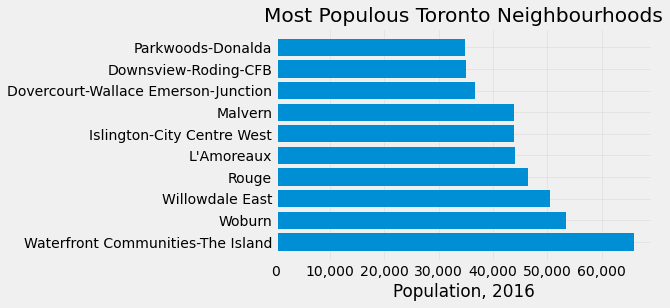

In [24]:
bar_fig, bar_ax = plt.subplots()
bar_ax.barh(top10_pop['neighbourhood'], top10_pop['pop_2016'])
bar_ax.xaxis.set_major_formatter('{x:,.0f}')
bar_ax.set_axisbelow(True)
bar_ax.grid(alpha=0.3)
bar_ax.set_title('Most Populous Toronto Neighbourhoods')
bar_ax.set_xlabel('Population, 2016')

Text(0.5, 1.0, 'Neighbourhood Commuter Modes')

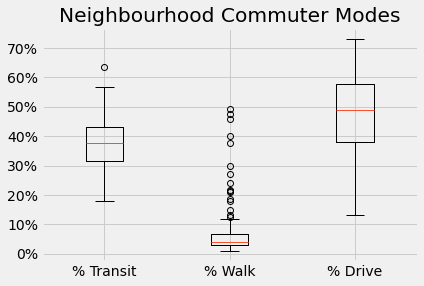

In [25]:
# create a box plot
box_fig, box_ax = plt.subplots()
box_ax.boxplot([neighbourhoods['pct_transit'], 
                neighbourhoods['pct_walk'],
                neighbourhoods['pct_drive']],
               # add labels so we know which box is which var
              labels=['% Transit', '% Walk', '% Drive'])
box_ax.yaxis.set_major_formatter('{x:.0%}')
box_ax.set_title('Neighbourhood Commuter Modes')

Text(0, 0.5, '# of Neighbourhoods')

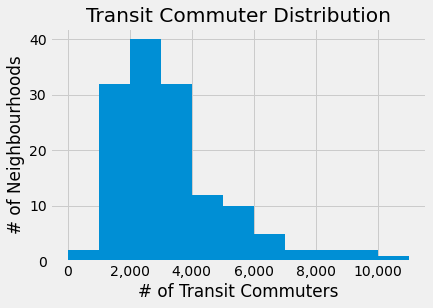

In [26]:
# create a histogram
hist_fig, hist_ax = plt.subplots()
hist_ax.hist(neighbourhoods['transit'], 
             # count the neighbourhoods with 0-1000 transit commuters, 
             # 1001-2000 transit commuters, etc
             bins=range(0, 12000, 1000))
hist_ax.xaxis.set_major_formatter('{x:,.0f}')
hist_ax.set_title('Transit Commuter Distribution')
hist_ax.set_xlabel('# of Transit Commuters')
hist_ax.set_ylabel('# of Neighbourhoods')

## Layering plots

We've seen that a single Axes can have more than one set of data points plotted on it with our multi-modal scatterplot. We can similarly layer on other graphics, using the `alpha` argument to set transparency.

<AxesSubplot:>

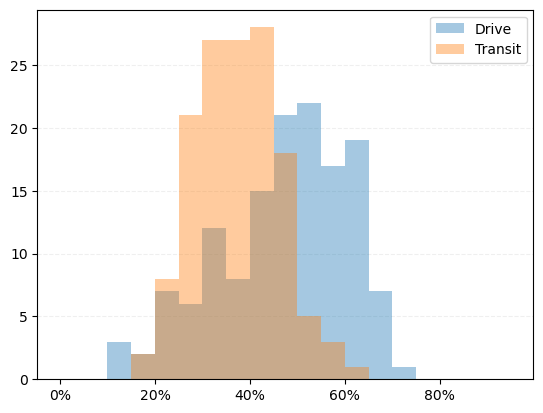

In [78]:
layer_fig, layer_ax = plt.subplots()

settings = {'alpha': 0.4, 'bins': np.arange(0, 1, .05)}

layer_ax.hist(neighbourhoods['pct_drive'],
              label='Drive',
              **settings)
layer_ax.hist(neighbourhoods['pct_transit'],
              label='Transit',
             **settings)
layer_ax.xaxis.set_major_formatter('{x:.0%}')
layer_ax.set_axisbelow(True)
layer_ax.grid(alpha=0.2, linestyle='--', axis='y')
layer_ax.legend()
layer_ax

## More complex plots

Let's try plotting the number of reported bike thefts each year by whether the bike was recovered or not. We'll need to wrangle the theft data a bit to get counts by year and status. Then, we'll use the data to make a `stackplot()`. Finally, we'll style it.

In [27]:
# review the available columns
thefts_joined.columns

Index(['_id', 'objectid', 'event_unique_id', 'primary_offence',
       'occurrence_date', 'occurrence_year', 'occurrence_month',
       'occurrence_dayofweek', 'occurrence_dayofmonth', 'occurrence_dayofyear',
       'occurrence_hour', 'report_date', 'report_year', 'report_month',
       'report_dayofweek', 'report_dayofmonth', 'report_dayofyear',
       'report_hour', 'division', 'city', 'hood_id', 'neighbourhoodname',
       'location_type', 'premises_type', 'bike_make', 'bike_model',
       'bike_type', 'bike_speed', 'bike_colour', 'bike_cost', 'status',
       'objectid2', 'geometry', 'neighbourhood', 'n_id', 'designation',
       'pop_2016', 'pop_2011', 'pop_change', 'private_dwellings',
       'occupied_dwllings', 'pop_dens', 'area', 'total_commuters', 'drive',
       'car_passenger', 'transit', 'walk', 'bike', 'other', 'pct_bike'],
      dtype='object')

In [28]:
thefts_grouped = (thefts_joined
                  .groupby(['occurrence_year', 'status'])
                  .agg(thefts=('_id', 'count'))
                  .reset_index()  # make occurrence year a regular col
                  .pivot(index='occurrence_year',
                         columns='status',
                         values='thefts')
                  .reset_index()  # ...and again
                  .fillna(0))
thefts_grouped

status,occurrence_year,RECOVERED,STOLEN,UNKNOWN
0,2009,0.0,1.0,0.0
1,2010,0.0,2.0,0.0
2,2011,0.0,3.0,0.0
3,2012,0.0,2.0,0.0
4,2013,1.0,43.0,2.0
5,2014,50.0,2916.0,65.0
6,2015,43.0,3177.0,69.0
7,2016,49.0,3692.0,72.0
8,2017,43.0,3766.0,63.0
9,2018,49.0,3865.0,46.0


Text(0.5, 0, 'Year')

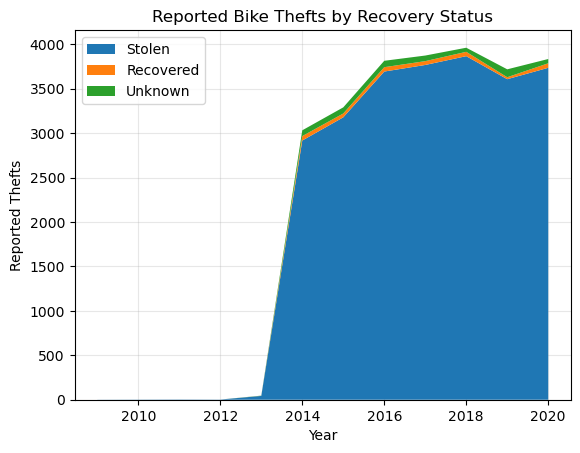

In [79]:
stfig, stax = plt.subplots()

stax.stackplot(thefts_grouped['occurrence_year'], 
        thefts_grouped['STOLEN'], 
        thefts_grouped['RECOVERED'],
        thefts_grouped['UNKNOWN'],
       labels=['Stolen', 'Recovered', 'Unknown'])
stax.set_axisbelow(True)
stax.grid(alpha=0.3)
stax.legend(loc='upper left')
stax.set_title('Reported Bike Thefts by Recovery Status')
stax.set_ylabel('Reported Thefts')
stax.set_xlabel('Year')

## Subplots

We can create multiple Axes in one Figure by passing `nrows` and `ncols` arguments to `subplots()`. The number of Axes we get equals `nrows` * `ncols`. Multiple Axes are returned as a `numpy` array.

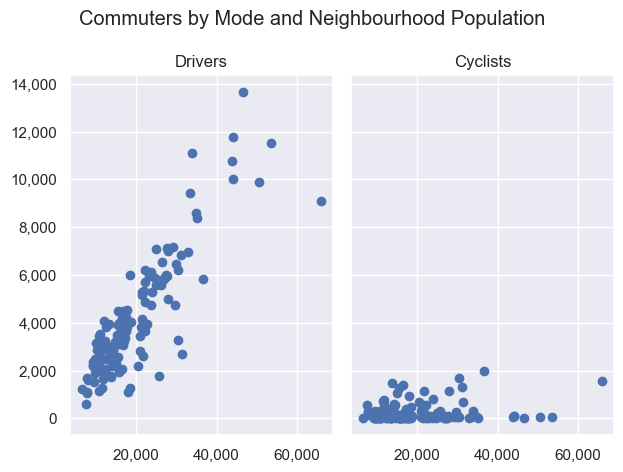

In [141]:
modefig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.scatter(neighbourhoods['pop_2016'],
           neighbourhoods['drive'])
ax2.scatter(neighbourhoods['pop_2016'],
           neighbourhoods['bike'])
ax1.set_title('Drivers')
ax2.set_title('Cyclists')
ax1.yaxis.set_major_formatter('{x:,.0f}')
ax1.xaxis.set_major_formatter('{x:,.0f}')
ax2.xaxis.set_major_formatter('{x:,.0f}')
modefig.suptitle('Commuters by Mode and Neighbourhood Population')
modefig.tight_layout()

### Unpacking subplots

As the number of subplots grows, it gets cumbersome to unpack them in the assignment statement. We can temporarily assign all of them to a single variable.

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

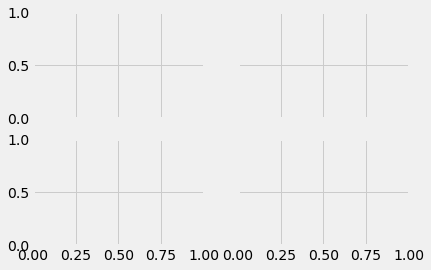

In [31]:
# make a 2x2 grid of subplots
modefig2, mode_ax = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)
mode_ax

The Axes are arranged in a 2x2 array. It would be more straightforward to refer to them if we had a 1x4 array instead.

In [32]:
# accessing items in a 2x2 array can be annoying
mode_ax

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [33]:
# example: getting the bottom left Axes
mode_ax[1, 0]

<AxesSubplot:>

We can take advantage of `numpy` arrays' `flatten()` method. Recall that `flatten()` returns a new array with all the elements arranged in a single row. We can then unpack the elements of that row and assign them to individual variables.

In [34]:
# recall what flatten() does
mode_ax.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

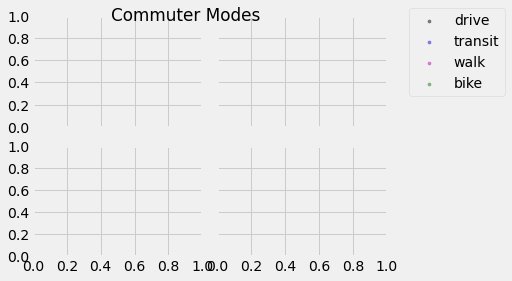

In [80]:
a1, a2, a3, a4 = mode_ax.flatten()
modefig2  # we haven't changed the Figure

### Plotting with helper functions

Plotting commute mode against total population four times will be tedious. To reuse code, we can write a helper function that takes an Axes, the mode we're plotting, and a dictionary of style parameters and updates the Axes. `**param_dict` unpacks the dictionary of parameters and arguments passed to `plot_modes()` and passes them on to `scatter()`.

In [81]:
def plot_modes(ax, mode, param_dict):
    '''
    Helper function to plot neighbourhood pop
    against commuting mode.
    '''
    defaults = {'alpha': 0.45, 's': 10}
    defaults.update(param_dict)
    out = ax.scatter(neighbourhoods['pop_2016'],
                     neighbourhoods[mode],
                     **defaults)
    return out

Then, we can call `plot_modes` to plot each of the subplots. 

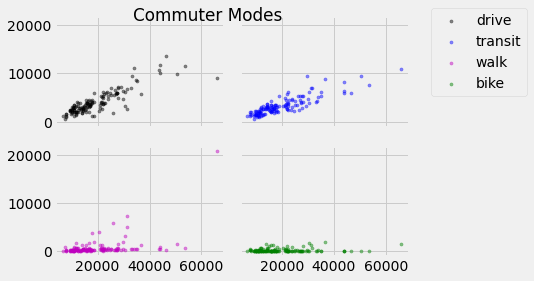

In [37]:
# add data to each axes
plot_modes(a1, 'drive', {'label': 'drive', 'facecolor': 'k'})
plot_modes(a2, 'transit', {'label': 'transit', 'facecolor': 'b'})
plot_modes(a3, 'walk', {'label': 'walk', 'facecolor': 'm'})
plot_modes(a4, 'bike', {'label': 'bike', 'facecolor': 'g'})
modefig2.legend(bbox_to_anchor=(1, 1), loc='upper left')
modefig2.tight_layout()
modefig2.suptitle('Commuter Modes')
modefig2

### Clearing plots

Successive method calls on an Axes object layer on graphics. To clear everything from an Axes, we can use its `clear()` method. To clear every subplot in a Figure, we can loop through the flattened array of Axes and `clear()` each Axes in turn.

In [38]:
for axes in mode_ax.flatten():
    axes.clear()

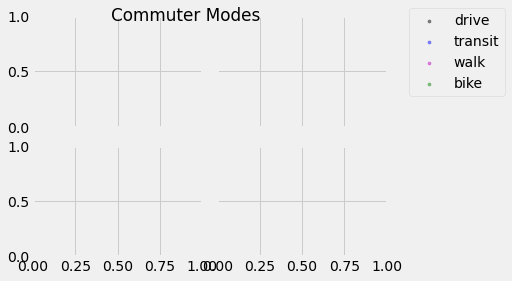

In [39]:
modefig2

In [40]:
# let's reset our style before moving on
plt.style.use('default')

# `seaborn`

## Easier plotting with `seaborn`

`seaborn` builds upon and complements `matplotlib`, producing nicer-looking Axes with less code, and giving us a few more convenient plot types. `seaborn` is typically given the alias `sns`, after a pop culture reference.

In [41]:
import seaborn as sns

With `seaborn`, we have two ways of structuring arguments to plotting functions:
* specifying the `x` and `y` axis columns
* specifying the `data` we are visualizing, then the `x` and `y` axis columns

<AxesSubplot:xlabel='pop_dens', ylabel='pct_transit'>

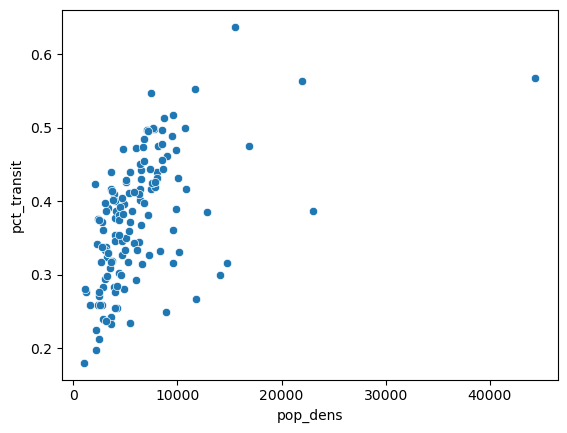

In [82]:
# use x and y axis columns
sns.scatterplot(x=neighbourhoods['pop_dens'], 
                y=neighbourhoods['pct_transit']) 

<AxesSubplot:xlabel='pop_dens', ylabel='pct_transit'>

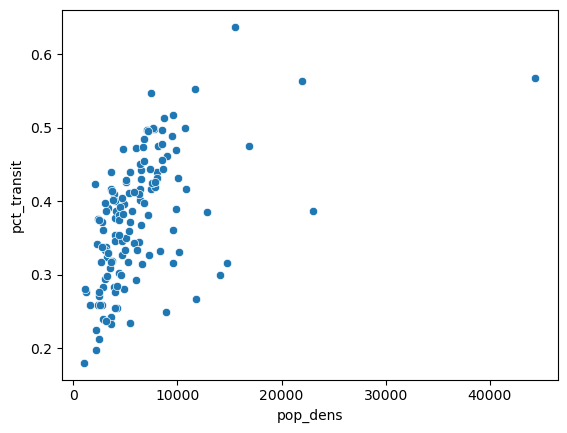

In [43]:
# use the dataframe and column names
sns.scatterplot(data=neighbourhoods, 
                x='pop_dens', 
                y='pct_transit')

For comparison, we can create the same plot using `matplotlib`'s `pyplot` approach.

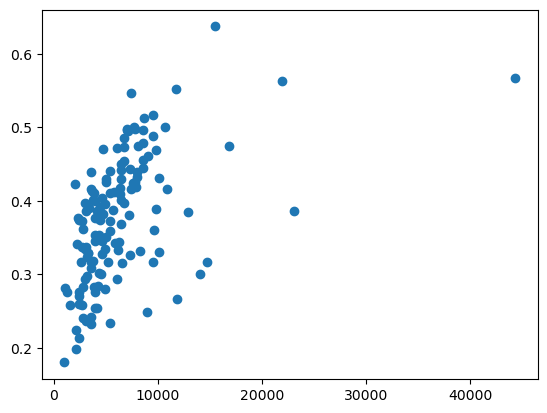

In [44]:
plt.scatter(neighbourhoods['pop_dens'], 
            neighbourhoods['pct_transit'])

## `seaborn` and object-oriented `matplotlib`

We can use `seaborn` as a complement to `matplotlib`'s object-oriented approach. `seaborn` functions that work in individual plots have an optional keyword argument that lets us pass in an existing Axes to update. As a bonus, they return the Axes we're working with, making it easy to chain methods together.

Let's revisit our 10 biggest Toronto neighbourhoods chart.

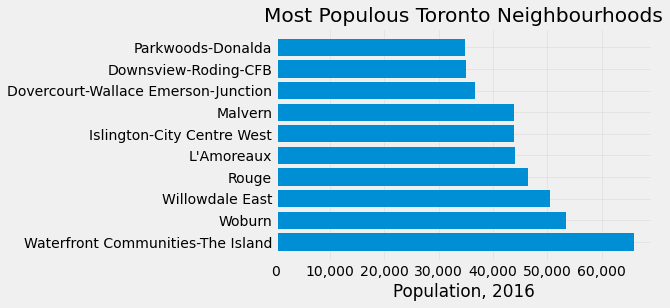

In [132]:
bar_fig

This was the code to create that plot. We'll recreate it with `seaborn`.

```python
bar_ax = plt.subplots()
bar_ax.barh(top10_pop['neighbourhood'], top10_pop['pop_2016'])
bar_ax.xaxis.set_major_formatter('{x:,.0f}')
bar_ax.set_axisbelow(True)
bar_ax.grid(alpha=0.3)
bar_ax.set_title('Most Populous Toronto Neighbourhoods')
bar_ax.set_xlabel('Population, 2016')
```

And with `seaborn`:

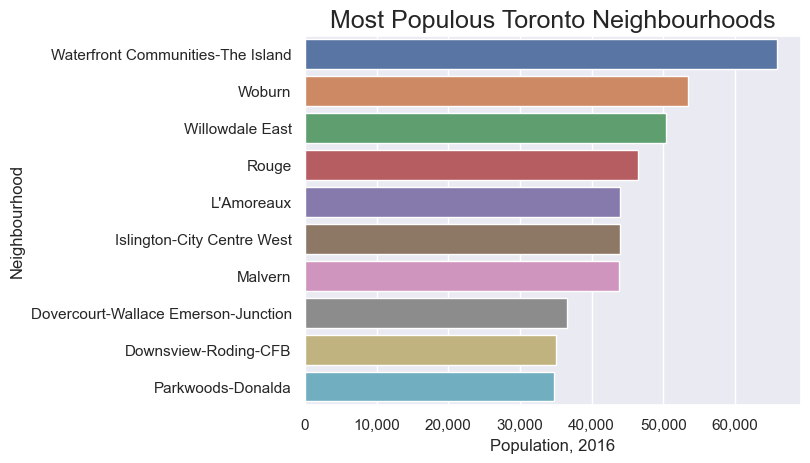

In [150]:
sns.set_theme()
sns_fig, sns_ax = plt.subplots()
(sns.barplot(data=top10_pop, 
            x='pop_2016', 
            y='neighbourhood', 
            ax=sns_ax)
 .set(xlabel='Population, 2016',
      ylabel='Neighbourhood'))
sns_ax.set_title('Most Populous Toronto Neighbourhoods',
                fontdict={'fontsize': 18})
sns_ax.xaxis.set_major_formatter('{x:,.0f}')

## Facets

With `matplotlib`, we created individual subplots and updated them with a helper function to visualize data for different categories. With `seaborn`, we can create a `FacetGrid` and then use its `map()` method to visualize data by category. `map()` takes the name of the plotting function to use, then the needed arguments, such as the columns to use for the x-axis and y-axis.

In [129]:
# reshape neighbourhood data to support faceting
neighbourhoods_reshaped = (neighbourhoods[['neighbourhood', 
                                           'pct_transit', 
                                           'pct_drive', 
                                           'pct_walk', 
                                           'pct_bike']]
                           .melt(id_vars='neighbourhood'))
neighbourhoods_reshaped.head()

,neighbourhood,variable,value
0,Agincourt North,pct_transit,0.283
1,Agincourt South-Malvern West,pct_transit,0.294
2,Alderwood,pct_transit,0.213
3,Annex,pct_transit,0.416
4,Banbury-Don Mills,pct_transit,0.258


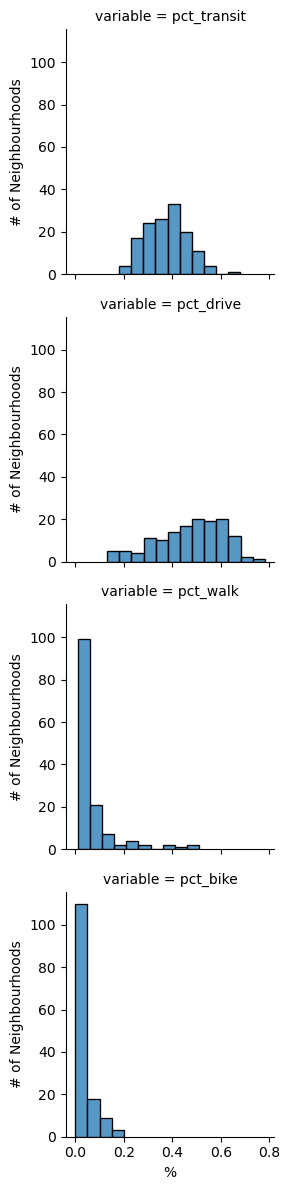

In [131]:
# specify the data to use and the column to facet by
# we'll give each variable its own row
facets = sns.FacetGrid(data=neighbourhoods_reshaped, row='variable')

# create a histogram for each mode
facets.map(sns.histplot, 'value', binwidth=0.05)
facets.set_axis_labels('%', '# of Neighbourhoods')

For another example, we can plot reported bike thefts by year, faceted by status.

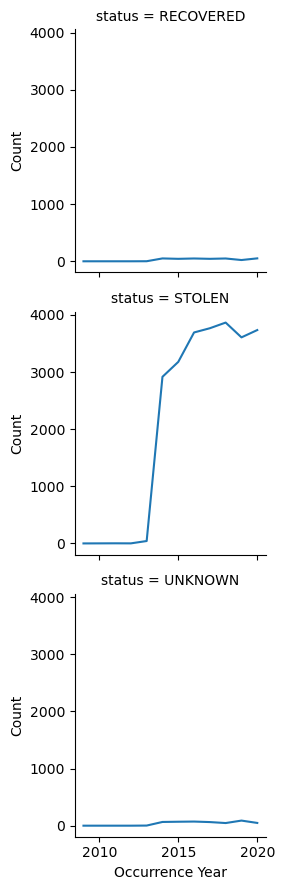

In [121]:
# reshape the theft counts to support faceting
theft_counts_long = thefts_grouped.melt(id_vars='occurrence_year', 
                                        value_name='Count')

# specify the data to use and the column to facet by
# we'll give each status its own row
facets = sns.FacetGrid(data=theft_counts_long, row='status')

# for each status, create a lineplot of counts by year
facets.map(sns.lineplot, 'occurrence_year', 'Count')
facets.set_axis_labels('Occurrence Year')

### Visualization for EDA

`seaborn`'s pair plots are particularly useful for exploratory analyses. `pairplot()` takes a DataFrame or series of columns and creates a grid of scatterplots, allowing us to visually look for relationships between variables. 

In [45]:
# review the columns available
neighbourhoods.columns

Index(['neighbourhood', 'n_id', 'designation', 'pop_2016', 'pop_2011',
       'pop_change', 'private_dwellings', 'occupied_dwllings', 'pop_dens',
       'area', 'total_commuters', 'drive', 'car_passenger', 'transit', 'walk',
       'bike', 'other', 'pct_bike', 'pct_drive', 'pct_cp', 'pct_transit',
       'pct_walk'],
      dtype='object')

In [46]:
# review just the numeric columns
neighbourhoods.select_dtypes('number').columns

Index(['pop_2016', 'pop_2011', 'pop_change', 'private_dwellings',
       'occupied_dwllings', 'pop_dens', 'area', 'total_commuters', 'drive',
       'car_passenger', 'transit', 'walk', 'bike', 'other', 'pct_bike',
       'pct_drive', 'pct_cp', 'pct_transit', 'pct_walk'],
      dtype='object')

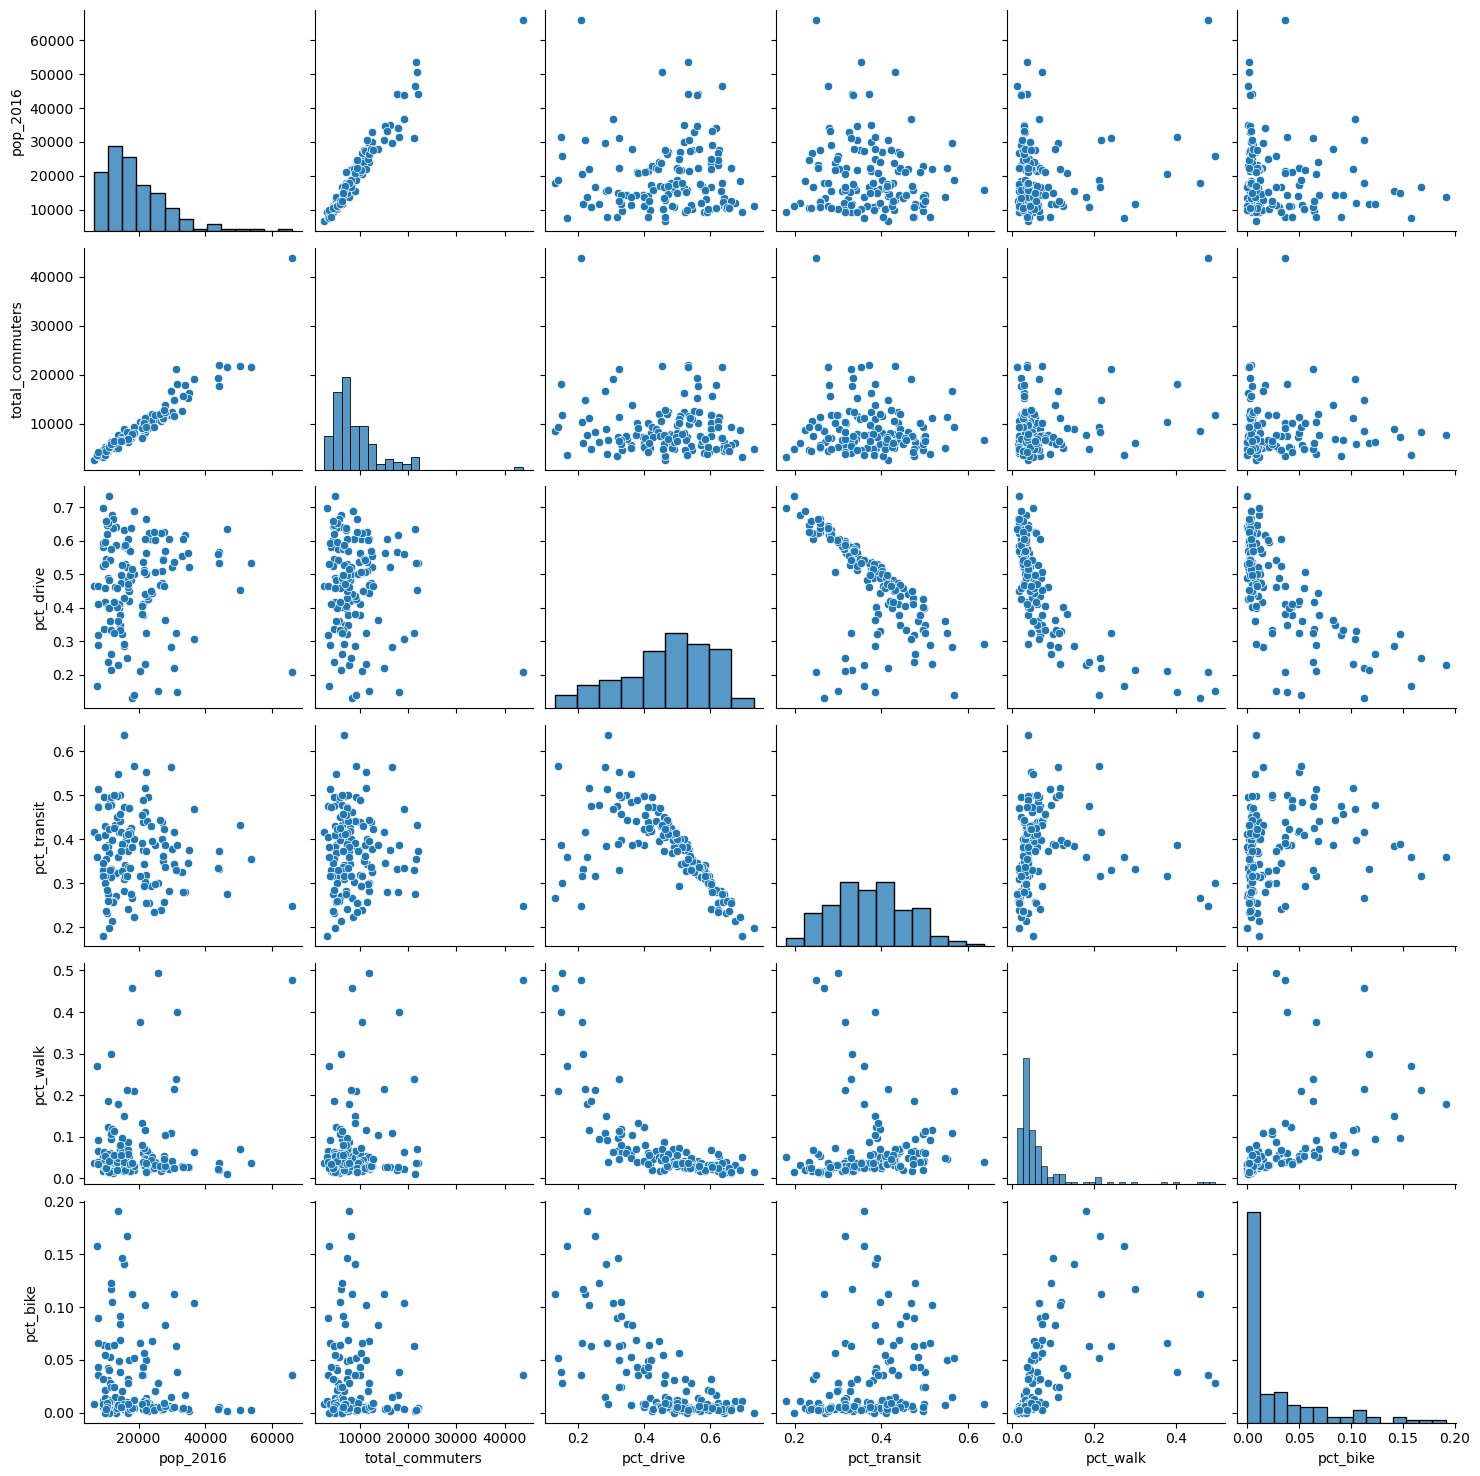

In [47]:
# select some columns to use in the pair plot
cols = ['pop_2016', 'total_commuters', 'pct_drive', 'pct_transit', 'pct_walk', 'pct_bike']
sns.pairplot(neighbourhoods[cols])

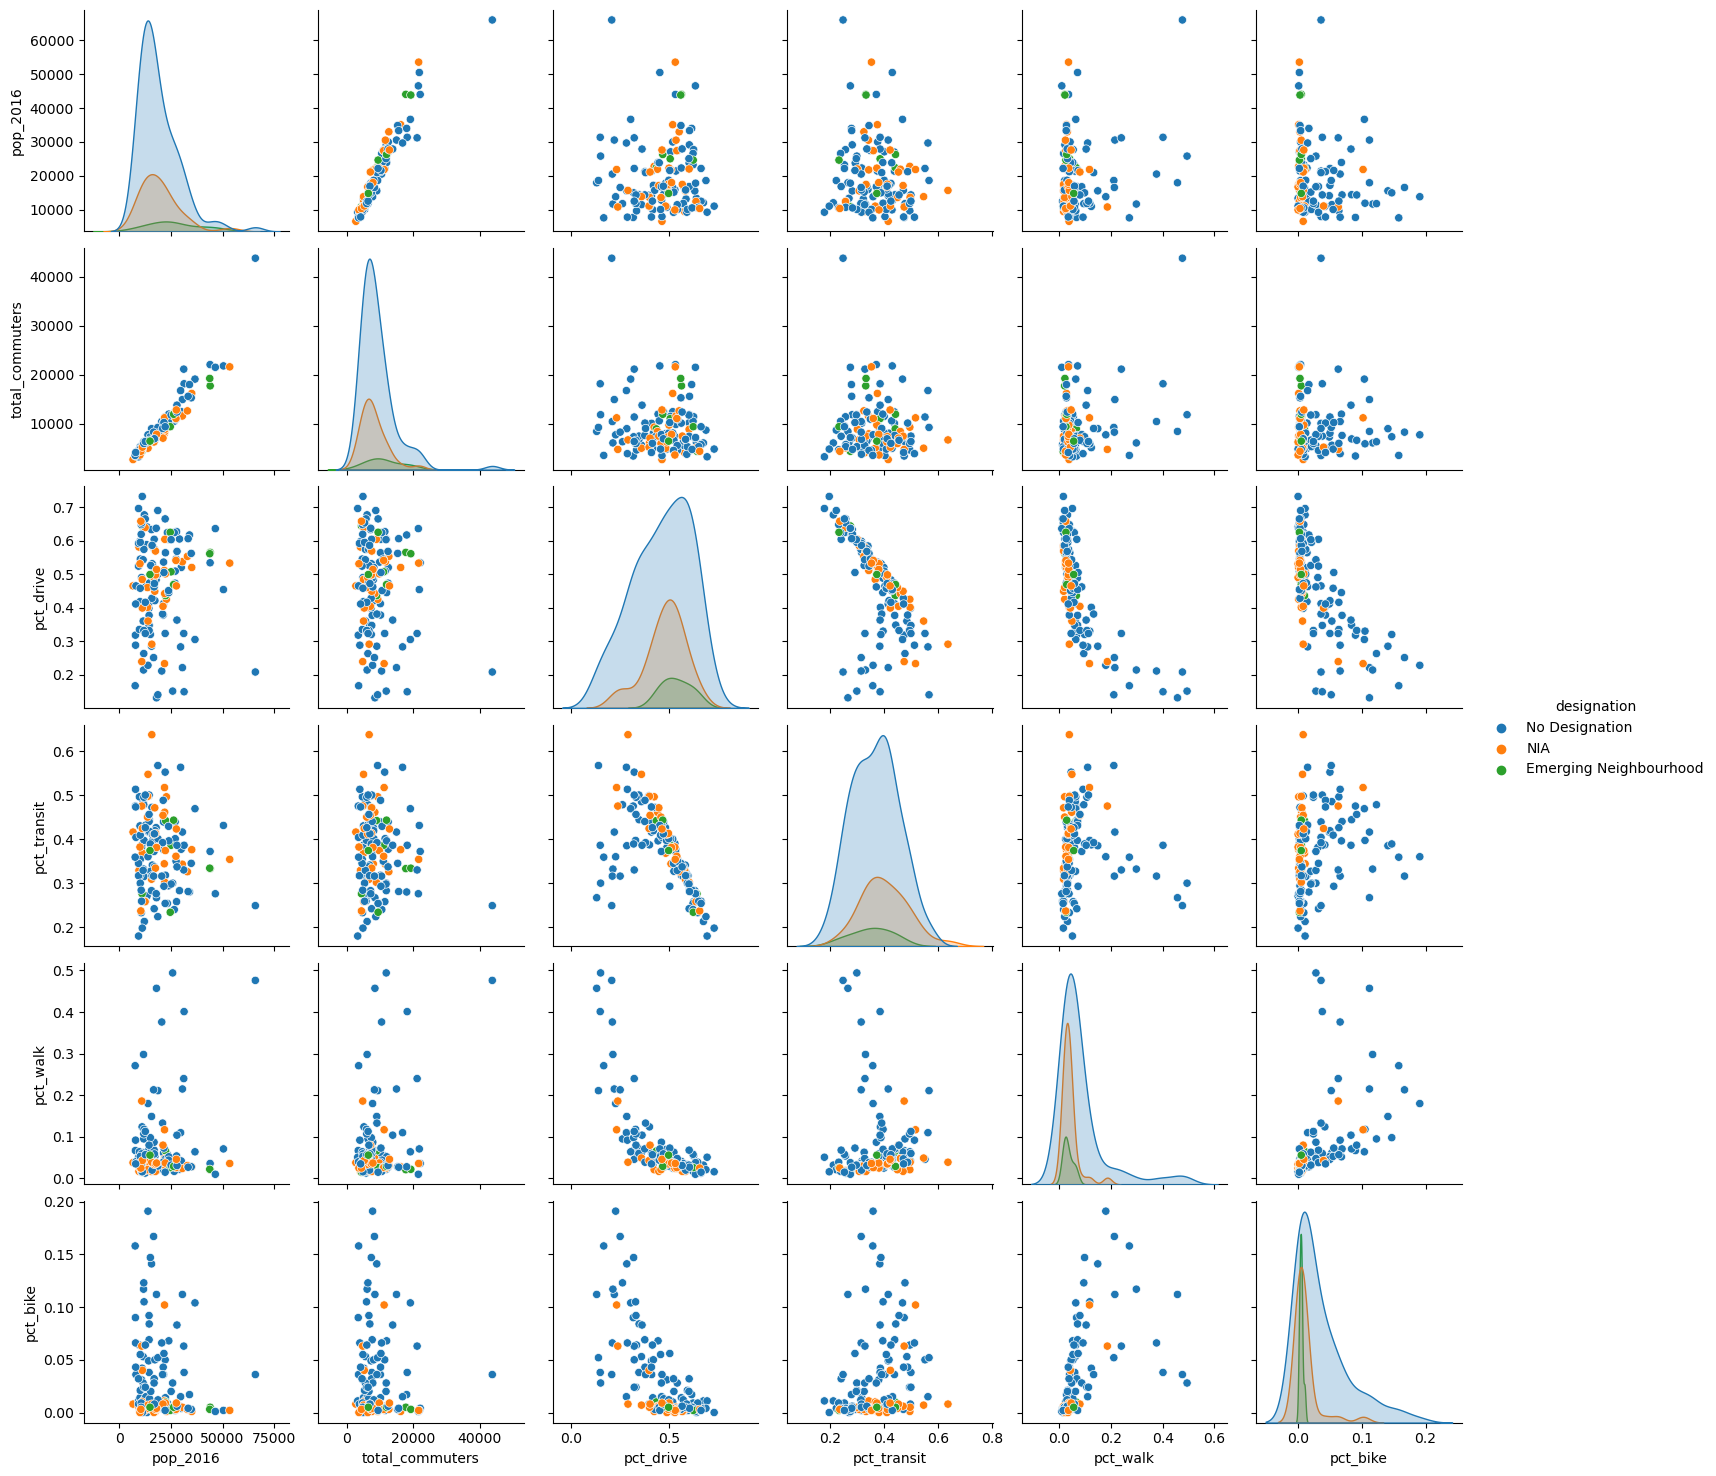

In [48]:
# if we include non-numeric variables, they won't be plotted, but we can use them for hue
cols = ['pop_2016', 'designation', 'total_commuters', 'pct_drive', 'pct_transit', 'pct_walk', 'pct_bike']
sns.pairplot(neighbourhoods[cols], hue='designation')

We can combine `seaborn`'s `heatmap()` function with the `pandas` Dataframe `corr()` method to explore correlations in our data.

<AxesSubplot:>

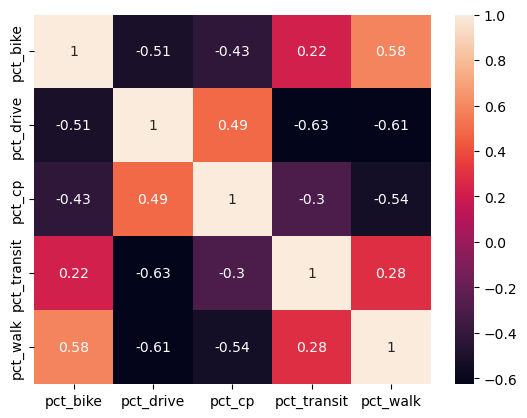

In [49]:
correlations = neighbourhoods.loc[:, 'pct_bike':].corr('kendall')
sns.heatmap(correlations, annot=True)

# References

- Matplotlib development team. _Basic usage_. https://matplotlib.org/stable/tutorials/introductory/usage.html
- Matplotlib development team. _The lifecycle of a plot_. https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py
- Matplotlib development team. _API reference_. https://matplotlib.org/stable/api/index.html
- Waskom, M. _An introduction to seaborn_. https://seaborn.pydata.org/introduction.html
- Waskom, M. _API reference_. https://seaborn.pydata.org/api.html
